In [93]:
import joblib as jb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Union, Optional
from scipy.stats import randint, uniform
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.base import BaseEstimator

# graph styling
%matplotlib inline 
plt.style.use('seaborn-dark')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

In [2]:
def RMSE(actual:Union[List, int, float], predictions: Union[List, int, float]) -> float:
    '''
    Calculates the root mean squared errors for a set of predictions
    input:
        actual: the actual perdiction or score
        preidctions: the model predicts
    '''
    MSE = mean_squared_error(actual, predictions)
    return round(np.sqrt(MSE), 2)

In [3]:
df = pd.read_csv('magnitudes.csv', )
actual = df['speed']
X = df.drop('speed', axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, actual, test_size=0.2, random_state=2)

In [22]:
regr = AdaBoostRegressor()
regr.fit(x_train, y_train)
ada_preds = regr.predict(x_test)
regr.score(x_test, y_test)

0.5699419131459307

In [23]:
ada_grid = {
    'learning_rate': uniform(0.05, 0.5), 
    'n_estimators': randint(100, 1000),
    'loss': ['linear', 'square', 'exponential']
}

regr = RandomizedSearchCV(AdaBoostRegressor(), ada_grid, n_iter=1000, 
                                   cv=5, verbose=2, n_jobs=-1, 
                                   scoring='neg_root_mean_squared_error')

regr.fit(x_train, y_train)
ada_preds = regr.predict(x_test)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 60.3min finished


In [7]:
# The coefficients
#print('Coefficients: \n', regression.coef_)
# The mean squared error
print(f'Root Mean squared error: {round(np.sqrt(mean_squared_error(y_test, ada_preds)), 2)}')

Root Mean squared error: 4.38


In [25]:
# save model
jb.dump(regr, 'ada_regressor_grid.pkl')

['ada_regressor_grid.pkl']

In [87]:
import xgboost as xgb

xgb_grid = {
    'learning_rate': uniform(0.1, 0.5), 
    'max_depth': randint(3, 6), 
    'min_child_weight': randint(4, 6), 
    'subsample': uniform(0.2, 0.6),
    'n_estimators': randint(150, 1000),
}

xgb_regressor = RandomizedSearchCV(xgb.XGBRegressor(), xgb_grid, n_iter=2000, 
                                   cv=5, verbose=3, n_jobs=-1, 
                                   scoring='neg_root_mean_squared_error')

xgb_regressor.fit(x_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E39157A388>,
                                        'n_estimators'

In [88]:
xgb_preds = xgb_regressor.predict(x_test)
# The mean squared error
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, xgb_preds)), 2)}')

Root Mean Squared Error: 3.73


In [94]:
xgb_regressor.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.10806048824645356, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=626, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.3499542372030241,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
# save model
jb.dump(xgb_regressor, 'xgb_regressor_2.pkl')

['xgb_regressor_2.pkl']

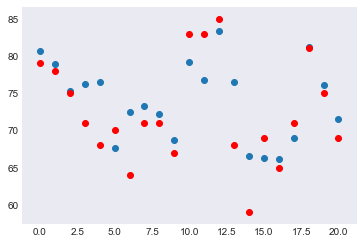

In [10]:
plt.scatter(range(len(xgb_preds)), xgb_preds)
plt.scatter(range(len(y_test)), y_test, color='red')
plt.show()

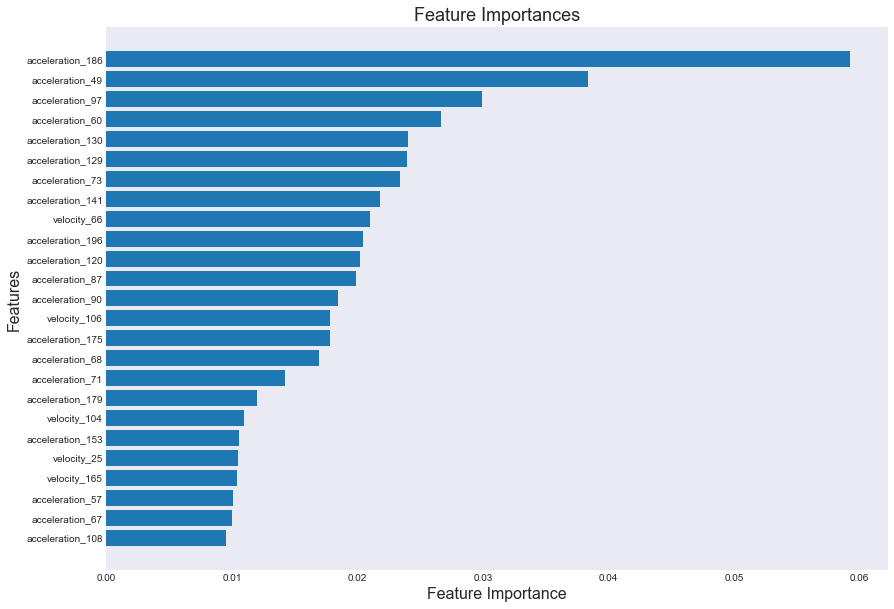

In [90]:
def plot_feature_importance(model: BaseEstimator, x_train: List, n: Optional[int] = 12) -> None:
    """ This function recievies a model and plots the 'n' most important features"""
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values

    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix = feature_matrix[feature_matrix[:, 0].argsort()]

    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]

    # plot the features
    plt.figure(figsize=(14, 10))
    if n > len(sorted_feat):
        plt.barh(sorted_columns, sorted_feat, align='center')
    else:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')

    # add label and titles
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.title('Feature Importances', fontsize=18)
    plt.xlabel('Feature Importance', fontsize=16)
    plt.ylabel('Features', fontsize=16)
    return

plot_feature_importance(xgb_regressor.best_estimator_, x_train, n=25)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
from sklearn.svm import SVC
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)
svm = SVC(C=5, gamma='auto')
svm.fit(pca_train, y_train)

svm_preds = svm.predict(pca_test)
# The mean squared error
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, svm_preds)), 2)}')

Root Mean Squared Error: 2.89


In [56]:
jb.dump(svm, 'svm_regressor.pkl')

['xvm_regressor.pkl']

In [84]:
pca = PCA(n_components=10)
pca.fit(X)

pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)

svm_grid = {
    'C': randint(1,6),
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': randint(1, 7),
    'gamma': ['scale', 'auto']
}

svm_regressor = RandomizedSearchCV(SVC(), svm_grid, n_iter=2000, 
                                   cv=5, verbose=3, n_jobs=-1, 
                                   scoring='neg_root_mean_squared_error')

svm_regressor.fit(pca_train, y_train)
svm_preds = svm_regressor.predict(pca_test)
# The mean squared error
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, svm_preds)), 2)}')

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


The least populated class in y has only 1 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1520 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 6640 tasks      | elapsed:   11.5s


Root Mean Squared Error: 3.38


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   16.4s finished


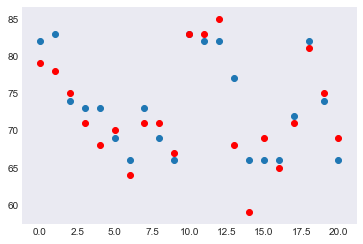

In [92]:
plt.scatter(range(len(xgb_preds)), svm_preds)
plt.scatter(range(len(y_test)), y_test, color='red')
plt.show()

In [81]:
svm_regressor.best_estimator_.get_params()

{'C': 5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [85]:
svm = jb.load('svm_regressor.pkl')
svm_preds2 = svm.predict(pca_test)
# The mean squared error
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, svm_preds2)), 2)}')

Root Mean Squared Error: 2.89
